In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
from pygeocoder import Geocoder
import os



In [ ]:
#Filtering down columns
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
#Hazard Mitigation Grant Program Disaster Summaries - disasterNumber and obligatedTotalAmount

In [16]:
geo_codes = pd.read_csv('Geocodes_USA_with_Counties.csv')
geo_codes

,zip,primary_city,state,latitude,longitude,county,type,world_region,country,decommissioned,estimated_population,notes
0,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,384,NaN
1,544,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,0,NaN
2,601,Adjuntas,PR,18.16,-66.72,Adjuntas,STANDARD,NaN,US,0,0,NaN
3,602,Aguada,PR,18.38,-67.18,NaN,STANDARD,NaN,US,0,0,NaN
4,603,Aguadilla,PR,18.43,-67.15,Aguadilla,STANDARD,NaN,US,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
42517,99926,Metlakatla,AK,55.14,-131.49,Prince of Wales-Outer Ketchikan Borough,PO BOX,NaN,US,0,1018,NaN
42518,99927,Point Baker,AK,56.30,-133.57,Prince of Wales-Outer Ketchikan Borough,PO BOX,NaN,US,0,0,NaN
42519,99928,Ward Cove,AK,55.45,-131.79,Ketchikan Gateway Borough,PO BOX,NaN,US,0,1281,NaN
42520,99929,Wrangell,AK,55.95,-131.96,Wrangell Borough,PO BOX,NaN,US,0,1956,NaN


In [5]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
haz_project_clean.head()

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R


In [17]:
haz_project_county = haz_project[['state', 'county', 'disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
county_project = haz_project_county.dropna()
county_project

,state,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.00,1.371,21420.0,DR-1971-0561-R
1,Alabama,St. Clair,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.00,1.371,21420.0,DR-1971-0428-R
2,Alabama,Jefferson,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.00,4.460,3181553.0,DR-1971-0430-R
3,Alabama,Franklin,1971.0,601.1: Generators,0,0,42578.0,31934.00,0.000,0.0,DR-1971-0373-F
4,Alabama,Cullman,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.00,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...,...,...
29187,Texas,Potter,5233.0,206.1: Safe Room (Tornado and Severe Wind Shel...,1,0,1890000.0,990000.00,1.400,229307.0,DR-5233-0011-R
29189,New Jersey,Atlantic,4086.0,602.1: Other Equipment Purchase and Installation,0,0,73430.0,66087.00,5.969,517419.0,DR-4086-0646-R
29190,Washington,Pierce,4243.0,200.1: Acquisition of Private Real Property (S...,1,1,1535117.0,1151337.75,1.532,2351083.0,DR-4243-0009-R
29192,New Jersey,Atlantic,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.00,0.000,0.0,DR-4086-0647-R


In [11]:
with_counties = pd.merge(geo_codes, county_project, on="county")
with_counties

,zip,primary_city,state_x,latitude,longitude,county,type,world_region,country,decommissioned,...,state_y,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,1296.0,201.2: Relocation of Private Structures - Coas...,5,0,90685.0,68014.0,1.533,190869.0,DR-1296-0038-R
1,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,4020.0,800.1: Miscellaneous,1,0,7737.0,5803.0,1.000,1.0,DR-4020-0053-R
2,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,4085.0,403.2: Stormwater Management - Diversions,0,0,564000.0,564000.0,1.517,1067612.0,DR-4085-0010-R
3,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,1899.0,200.1: Acquisition of Private Real Property (S...,10,10,2291690.0,1718768.0,1.934,1094385.0,DR-1899-0016-R
4,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,1296.0,202.2: Elevation of Private Structures - Coastal,9,2,198574.0,148931.0,1.557,909233.0,DR-1296-0011-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577400,99362,Walla Walla,WA,46.11,-118.30,Walla Walla,STANDARD,NaN,US,0,...,Washington,5182.0,601.2: Generators - Regular,0,0,51000.0,38250.0,2.013,140099.0,DR-5182-0020-R
1577401,99363,Wallula,WA,46.06,-118.89,Walla Walla,PO BOX,NaN,US,0,...,Washington,5090.0,91.5: Local Multijurisdictional Multihazard Mi...,0,0,41212.0,30909.0,0.000,0.0,DR-5090-0001-P
1577402,99363,Wallula,WA,46.06,-118.89,Walla Walla,PO BOX,NaN,US,0,...,Washington,1734.0,91.1: Local Multihazard Mitigation Plan,0,0,24693.0,18303.0,0.000,0.0,DR-1734-0020-P
1577403,99363,Wallula,WA,46.06,-118.89,Walla Walla,PO BOX,NaN,US,0,...,Washington,1100.0,200.1: Acquisition of Private Real Property (S...,17,17,1319010.0,989257.0,1.252,946118.0,DR-1100-0016-R


In [18]:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
disaster_sum = pd.read_csv('DisasterDeclarationsSummaries.csv')
disaster_sum_clean = disaster_sum[['disasterNumber', 'state', 'declarationType', 'fyDeclared', 'incidentType']]
disaster_sum_clean.head()

,disasterNumber,state,declarationType,fyDeclared,incidentType
0,1,GA,DR,1953,Tornado
1,4,MI,DR,1953,Tornado
2,3,LA,DR,1953,Flood
3,6,MI,DR,1953,Tornado
4,2,TX,DR,1953,Tornado


In [13]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
haz_project_clean.head()

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R


In [27]:
disaster_projects = pd.merge(county_project, disaster_sum_clean, on='disasterNumber')
disaster_summary = disaster_projects.groupby(['state_x', 'incidentType', 'disasterNumber', 'county', 'projectIdentifier']).mean()
disaster_summary.head(40)



numberOfProperties  \
state_x incidentType disasterNumber county     projectIdentifier                       
Alabama Flood        890.0          Colbert    DR-0890-0001-R                      0   
        Hurricane    1070.0         Baldwin    DR-1070-0015-R                      1   
                                               DR-1070-0016-R                      8   
                                               DR-1070-0019-R                      4   
                                    Calhoun    DR-1070-0004-R                     42   
                                               DR-1070-0018-R                     29   
                                               DR-1070-0023-R                      0   
                                    Etowah     DR-1070-0020-R                      0   
                                    Geneva     DR-1070-0010-R                     10   
                                    Jefferson  DR-1070-0003-R                    284   
                                    Macon      DR-1070-0001-R                      0   
                                    Montgomery DR-1070-0002-R                      0   
                                    Statewide  DR-1070-0012-F                      0   
                                               DR-1070-0013-F                      0   
                                               DR-1070-M001-M                      0   
                                    Talladega  DR-1070-0007-R                      0   
                                               DR-1070-0024-R                      0   
                     1250.0         Autauga    DR-1250-0004-R                      5   
                                    Barbour    DR-1250-0011-R                      0   
                                    Calhoun    DR-1250-0008-R                      0   
                                    Crenshaw   DR-1250-0016-R                      0   
                                    Dale       DR-1250-0005-R                      1   
                                    DeKalb     DR-1250-0015-R                      0   
                                    Geneva     DR-1250-0024-R                      5   
                                    Jefferson  DR-1250-0007-F                      0   
                                               DR-1250-0010-R                      2   
                                               DR-1250-0020-R                     68   
                                               DR-1250-0021-R                      1   
                                               DR-1250-0022-R                      7   
                                               DR-1250-0026-R                      1   
                                    Lee        DR-1250-0012-R                      1   
                                               DR-1250-0018-R                      0   
                                    Randolph   DR-1250-0013-R                      0   
                                    Statewide  DR-1250-0001-F                      0   
                                               DR-1250-0027-R                    587   
                                    Tallapoosa DR-1250-0014-R                      0   
                     1438.0         Autauga    DR-1438-0009-R                      3   
                                    Baldwin    DR-1438-0003-R                      1   
                                               DR-1438-0004-R                      1   
                                    Chilton    DR-1438-0001-F                      0   

                                                                  numberOfFinalProperties  \
state_x incidentType disasterNumber county     projectIdentifier                            
Alabama Flood        890.0          Colbert    DR-0890-0001-R                           0   
        Hurricane    1070.0         Baldwin    DR-1070-0015-R                           1 

In [23]:
disaster_sum_clean["incidentType"].value_counts()

Severe Storm(s)     17033
Hurricane           11012
Flood               10395
Biological           7645
Snow                 3659
Fire                 3336
Severe Ice Storm     1990
Tornado              1463
Drought              1292
Coastal Storm         572
Freezing              301
Other                 297
Earthquake            226
Typhoon               130
Volcano                51
Fishing Losses         42
Mud/Landslide          31
Dam/Levee Break        13
Tsunami                 9
Toxic Substances        9
Chemical                9
Human Cause             7
Terrorist               5
Name: incidentType, dtype: int64

In [28]:
storms_df = disaster_sum_clean[disaster_sum_clean["incidentType"] == "Severe Storm(s)"]
storms_df.head(30) 

,disasterNumber,state,declarationType,fyDeclared,incidentType
60,136,OR,DR,1963,Severe Storm(s)
102,104,OK,DR,1960,Severe Storm(s)
130,58,PA,DR,1956,Severe Storm(s)
135,56,NC,DR,1956,Severe Storm(s)
147,61,PA,DR,1956,Severe Storm(s)
175,103,TX,DR,1960,Severe Storm(s)
199,137,WA,DR,1963,Severe Storm(s)
543,198,MO,DR,1965,Severe Storm(s)
545,198,MO,DR,1965,Severe Storm(s)
546,198,MO,DR,1965,Severe Storm(s)


In [29]:
storms_merged = pd.merge(county_project, storms_df, on='disasterNumber')
storms_merged

,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType
0,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s)
1,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s)
2,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s)
3,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s)
4,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260783,West Virginia,Mingo,4378.0,601.2: Generators - Regular,0,0,159560.0,119670.0,3.062,622162.0,DR-4378-0004-R,WV,DR,2018,Severe Storm(s)
260784,West Virginia,Mingo,4378.0,601.2: Generators - Regular,0,0,159560.0,119670.0,3.062,622162.0,DR-4378-0004-R,WV,DR,2018,Severe Storm(s)
260785,West Virginia,Mingo,4378.0,601.2: Generators - Regular,0,0,159560.0,119670.0,3.062,622162.0,DR-4378-0004-R,WV,DR,2018,Severe Storm(s)
260786,West Virginia,Mingo,4378.0,601.2: Generators - Regular,0,0,159560.0,119670.0,3.062,622162.0,DR-4378-0004-R,WV,DR,2018,Severe Storm(s)


In [30]:
storm_summary = storms_merged.groupby(['state_x', 'disasterNumber', 'county', 'projectType', 'projectIdentifier']).mean()
storm_summary.head(50)

numberOfProperties  \
state_x disasterNumber county    projectType                                        projectIdentifier                       
Alabama 856.0          Calhoun   403.4: Stormwater Management - Detention/Retent... DR-0856-0009-R                      0   
                       Etowah    402.1: Infrastructure Protective Measures (Road... DR-0856-0010-R                      0   
                       Madison   103.1: Feasibility, Engineering and Design Studies DR-0856-0007-R                      0   
                       Statewide 600.1: Warning Systems (as a Component of a Pla... DR-0856-0006-F                      0   
                       Sumter    402.1: Infrastructure Protective Measures (Road... DR-0856-0004-R                      0   
        861.0          Autauga   501.1: Other Major Structural Projects             DR-0861-0006-R                      0   
                       Calhoun   403.1: Stormwater Management - Culverts            DR-0861-0023-R                      0   
                       Crenshaw  403.1: Stormwater Management - Culverts            DR-0861-0008-R                      0   
                                                                                    DR-0861-0017-R                      0   
                       Dale      200.1: Acquisition of Private Real Property (St... DR-0861-0013-R                      1   
                       Houston   200.1: Acquisition of Private Real Property (St... DR-0861-0012-R                      3   
                       Jefferson 200.1: Acquisition of Private Real Property (St... DR-0861-0021-R                      0   
                       Limestone 405.1: Other Minor Flood Control                   DR-0861-0018-R                      0   
                       Macon     402.1: Infrastructure Protective Measures (Road... DR-0861-0011-R                      0   
                       Mobile    200.1: Acquisition of Private Real Property (St... DR-0861-0024-R                     11   
        1013.0         Colbert   403.1: Stormwater Management - Culverts            DR-1013-0003-R                      0   
                                 403.2: Stormwater Management - Diversions          DR-1013-0002-R                      0   
                       Crenshaw  403.4: Stormwater Management - Detention/Retent... DR-1013-0014-R                      0   
                       Etowah    403.1: Stormwater Management - Culverts            DR-1013-0004-R                      0   
                       Limestone 400.1: Utility Protective Measures (Electric, G... DR-1013-0005-R                      0   
                                 401.1: Water and Sanitary Sewer System Protecti... DR-1013-0011-R                      0   
                                 402.1: Infrastructure Protective Measures (Road... DR-1013-0010-R                      0   
                       Mobile    200.1: Acquisition of Private Real Property (St... DR-1013-0012-R                      1   
                                                                                    DR-1013-0013-R                      3   
                       Statewide 600.1: Warning Systems (as a Component of a Pla... DR-1013-0001-F                      0   
                                                                                    DR-1013-0008-F                      0   
        1019.0         Calhoun   403.4: Stormwater Management - Detention/Retent... DR-1019-0008-R                      0   
                       DeKalb    200.1: Acquisition of Private Real Property (St... DR-1019-0004-R                     10   
                                                                                    DR-1019-0005-R                      4   
                       Limestone 200.1: Acquisition of Private Real Property (St... DR-1019-0007-R                      2   
                       Statewide 600.1: Warning Systems (as a Component of a Pla... DR-1019-0001-F     

In [31]:
storms_merged["projectType"].nunique()

248

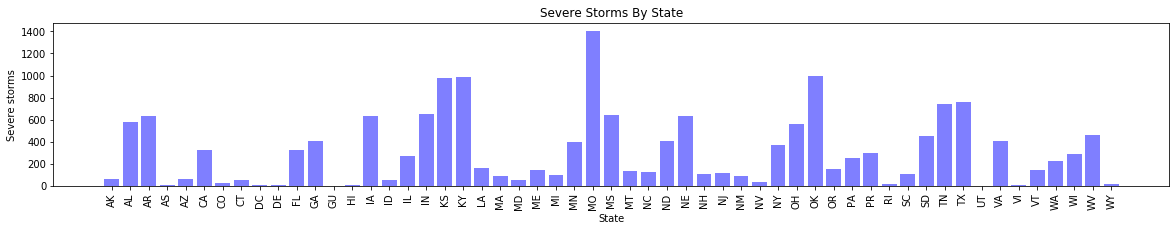

In [32]:
number_storms = storms_df.groupby("state")[["disasterNumber"]].count()
number_storms = number_storms.iloc[:,0]
x_axis = np.arange(len(number_storms))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, number_storms, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, number_storms.index, rotation="vertical")
plt.title("Severe Storms By State")
plt.xlabel("State")
plt.ylabel("Severe storms")
plt.show()

In [34]:
#Hazard Mitigation Grant Program Disaster Summaries
hazard_sum = pd.read_csv('code/Resources/HazardMitigationGrantProgramDisasterSummaries.csv')
hazard_sum_clean = hazard_sum[['disasterNumber', 'obligatedTotalAmount']]
hazard_sum_clean

,disasterNumber,obligatedTotalAmount
0,1071,2834575.0
1,1337,782081.0
2,1326,333150.0
3,1506,1791043.0
4,1211,413384.0
...,...,...
1731,4551,0.0
1732,4556,0.0
1733,4553,0.0
1734,4554,0.0


In [35]:
funding_sum = pd.merge(storms_merged, hazard_sum_clean, on="disasterNumber")
funding_sum = funding_sum.drop_duplicates(subset=["disasterNumber", "projectIdentifier"], keep=False)
funding_sum


,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType,obligatedTotalAmount
54224,Alaska,Statewide,1865.0,700.1: Management Costs - Salaries,0,0,23530.0,23530.0,0.000,0.0,DR-1865-0001-M,AK,DR,2010,Severe Storm(s),504725.0
54225,Alaska,Kenai Peninsula,1865.0,"400.1: Utility Protective Measures (Electric, ...",0,0,291611.0,218708.0,1.090,337800.0,DR-1865-0002-R,AK,DR,2010,Severe Storm(s),504725.0
54226,Alaska,Kenai Peninsula,1865.0,405.1: Other Minor Flood Control,0,0,349982.0,262487.0,1.317,460917.0,DR-1865-0003-R,AK,DR,2010,Severe Storm(s),504725.0
98084,Virgin Islands of the U.S.,St. Croix,1949.0,"400.1: Utility Protective Measures (Electric, ...",0,0,184389.0,138292.0,1.153,655232.0,DR-1949-0001-R,VI,DR,2011,Severe Storm(s),156373.0
98085,Virgin Islands of the U.S.,Statewide,1949.0,700.1: Management Costs - Salaries,0,0,18081.0,18081.0,0.000,0.0,DR-1949-0002-M,VI,DR,2011,Severe Storm(s),156373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259265,Missouri,Webster,1667.0,402.1: Infrastructure Protective Measures (Roa...,0,0,170667.0,128000.0,2.079,354868.0,DR-1667-0001-R,MO,DR,2007,Severe Storm(s),128567.0
259419,Maine,Aroostook,1644.0,403.1: Stormwater Management - Culverts,0,0,109900.0,82425.0,1.000,109900.0,DR-1644-0002-R,ME,DR,2006,Severe Storm(s),85895.0
259422,Maine,Aroostook,1716.0,200.1: Acquisition of Private Real Property (S...,1,1,192477.0,144358.0,0.000,0.0,DR-1716-0004-R,ME,DR,2007,Severe Storm(s),149208.0
260750,California,Riverside,4425.0,93.3: Tribal Multihazard Mitigation Plan - UPDATE,0,0,26116.0,19587.0,0.000,0.0,DR-4425-0001-P,CA,DR,2019,Severe Storm(s),19587.0


In [37]:
state_funds = funding_sum.groupby(['state_x', 'disasterNumber', 'county', 'projectType', 'projectIdentifier']).mean()
state_funds

numberOfProperties  \
state_x                    disasterNumber county        projectType                                        projectIdentifier                       
Alaska                     1584.0         Kodiak Island 205.6: Structural Retrofitting/Rehabilitating P... DR-1584-0003-R                      1   
                                          Nome (CA)     91.1: Local Multihazard Mitigation Plan            DR-1584-0001-P                      0   
                                          Statewide     301.1: Shoreline Stabilization (Riprap, etc.)      DR-1584-0004-R                      0   
                                                        600.1: Warning Systems (as a Component of a Pla... DR-1584-0005-F                      0   
                                                        700.1: Management Costs - Salaries                 DR-1584-0006-M                      0   
...                                                                                                                                          ...   
Utah                       4053.0         Statewide     104.1: Developing, Implementing and Enforcing C... DR-4053-0002-F                      0   
Virgin Islands of the U.S. 1949.0         St. Croix     400.1: Utility Protective Measures (Electric, G... DR-1949-0001-R                      0   
                                          Statewide     700.1: Management Costs - Salaries                 DR-1949-0002-M                      0   
Wyoming                    4306.0         Statewide     700.4: Management Costs - Supplies                 DR-4306-0003-M                      0   
                                          Weston        400.1: Utility Protective Measures (Electric, G... DR-4306-0004-R                      0   

                                                                                                                              numberOfFinalProperties  \
state_x                    disasterNumber county        projectType                                        projectIdentifier                            
Alaska                     1584.0         Kodiak Island 205.6: Structural Retrofitting/Rehabilitating P... DR-1584-0003-R                           0   
                                          Nome (CA)     91.1: Local Multihazard Mitigation Plan            DR-1584-0001-P                           0   
                                          Statewide     301.1: Shoreline Stabilization (Riprap, etc.)      DR-1584-0004-R                           0   
                                                        600.1: Warning Systems (as a Component of a Pla... DR-1584-0005-F                           0   
                                                        700.1: Management Costs - Salaries                 DR-1584-0006-M                           0   
...                                                                                                                                               ...   
Utah                       4053.0         Statewide     104.1: Developing, Implementing and Enforcing C... DR-4053-0002-F                           0   
Virgin Islands of the U.S. 1949.0         St. Croix     400.1: Utility Protective Measures (Electric, G... DR-1949-0001-R                           0   
                                          Statewide     700.1: Management Costs - Salaries                 DR-1949-0002-M                           0   
Wyoming                    4306.0         Statewide     700.4: Management Costs - Supplies                 DR-4306-0003-M                           0   
                                          Weston        400.1: Utility Protective Measures (Electric, G... DR-4306-0004-R                           0   

                                                                                                                              projectAmount  \
state_x                    disasterNumber county        projectType 

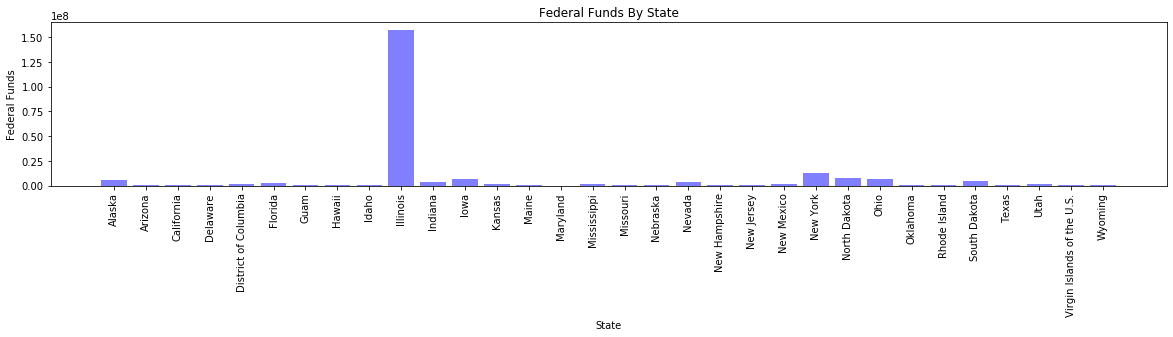

In [39]:
number_funds = state_funds.groupby("state_x")[["obligatedTotalAmount"]].sum()
number_funds = number_funds.iloc[:,0]
x_axis = np.arange(len(number_funds))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, number_funds, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, number_funds.index, rotation="vertical")
plt.title("Federal Funds By State")
plt.xlabel("State")
plt.ylabel("Federal Funds")
plt.show()

In [43]:
il = funding_sum[funding_sum["state_x"] == "Illinois"]
il

,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType,obligatedTotalAmount
199870,Illinois,Jo Daviess,1278.0,200.1: Acquisition of Private Real Property (S...,4,2,156000.0,110005.0,0.833,2078421.0,DR-1278-0001-R,IL,DR,1999,Severe Storm(s),113954.0
233114,Illinois,St. Clair,1188.0,200.1: Acquisition of Private Real Property (S...,39,39,1088699.0,14615.0,1.396,1541718.0,DR-1188-0023-R,IL,DR,1997,Severe Storm(s),8720293.0
233115,Illinois,Kane,1188.0,200.1: Acquisition of Private Real Property (S...,23,23,463278.0,347459.0,1.771,1373160.0,DR-1188-0012-R,IL,DR,1997,Severe Storm(s),8720293.0
233116,Illinois,Rock Island,1188.0,200.1: Acquisition of Private Real Property (S...,45,4,947244.0,235453.0,2.574,2438357.0,DR-1188-0022-R,IL,DR,1997,Severe Storm(s),8720293.0
233117,Illinois,Marshall,1188.0,200.1: Acquisition of Private Real Property (S...,28,17,1583824.0,492562.0,1.300,1205200.0,DR-1188-0016-R,IL,DR,1997,Severe Storm(s),8720293.0
233118,Illinois,White,1188.0,200.1: Acquisition of Private Real Property (S...,1,1,230001.0,16455.0,0.000,0.0,DR-1188-0009-R,IL,DR,1997,Severe Storm(s),8720293.0
233119,Illinois,Kane,1188.0,200.1: Acquisition of Private Real Property (S...,7,7,248344.0,186258.0,0.000,0.0,DR-1188-0017-F,IL,DR,1997,Severe Storm(s),8720293.0
233120,Illinois,Hardin,1188.0,200.1: Acquisition of Private Real Property (S...,3,2,50370.0,19370.0,2.609,272000.0,DR-1188-0018-R,IL,DR,1997,Severe Storm(s),8720293.0
233121,Illinois,Peoria,1188.0,200.1: Acquisition of Private Real Property (S...,15,13,817558.0,613168.0,1.273,1196478.0,DR-1188-0014-R,IL,DR,1997,Severe Storm(s),8720293.0
233122,Illinois,Statewide,1188.0,700.1: Management Costs - Salaries,0,0,464544.0,330711.0,0.000,0.0,DR-1188-M001-M,IL,DR,1997,Severe Storm(s),8720293.0


In [44]:
il["obligatedTotalAmount"].sum()

157079228.0

In [73]:
no_il = funding_sum[funding_sum["disasterNumber"] != 1188.0]
no_il["obligatedTotalAmount"].mean()


468154.0671034482

In [74]:
no_il["obligatedTotalAmount"] = no_il["obligatedTotalAmount"].apply(lambda x: "${:.1f}M".format((x/1000000)))
no_il

C:\Users\audri\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType,obligatedTotalAmount
54224,Alaska,Statewide,1865.0,700.1: Management Costs - Salaries,0,0,23530.0,23530.0,0.000,0.0,DR-1865-0001-M,AK,DR,2010,Severe Storm(s),$0.5M
54225,Alaska,Kenai Peninsula,1865.0,"400.1: Utility Protective Measures (Electric, ...",0,0,291611.0,218708.0,1.090,337800.0,DR-1865-0002-R,AK,DR,2010,Severe Storm(s),$0.5M
54226,Alaska,Kenai Peninsula,1865.0,405.1: Other Minor Flood Control,0,0,349982.0,262487.0,1.317,460917.0,DR-1865-0003-R,AK,DR,2010,Severe Storm(s),$0.5M
98084,Virgin Islands of the U.S.,St. Croix,1949.0,"400.1: Utility Protective Measures (Electric, ...",0,0,184389.0,138292.0,1.153,655232.0,DR-1949-0001-R,VI,DR,2011,Severe Storm(s),$0.2M
98085,Virgin Islands of the U.S.,Statewide,1949.0,700.1: Management Costs - Salaries,0,0,18081.0,18081.0,0.000,0.0,DR-1949-0002-M,VI,DR,2011,Severe Storm(s),$0.2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259265,Missouri,Webster,1667.0,402.1: Infrastructure Protective Measures (Roa...,0,0,170667.0,128000.0,2.079,354868.0,DR-1667-0001-R,MO,DR,2007,Severe Storm(s),$0.1M
259419,Maine,Aroostook,1644.0,403.1: Stormwater Management - Culverts,0,0,109900.0,82425.0,1.000,109900.0,DR-1644-0002-R,ME,DR,2006,Severe Storm(s),$0.1M
259422,Maine,Aroostook,1716.0,200.1: Acquisition of Private Real Property (S...,1,1,192477.0,144358.0,0.000,0.0,DR-1716-0004-R,ME,DR,2007,Severe Storm(s),$0.1M
260750,California,Riverside,4425.0,93.3: Tribal Multihazard Mitigation Plan - UPDATE,0,0,26116.0,19587.0,0.000,0.0,DR-4425-0001-P,CA,DR,2019,Severe Storm(s),$0.0M


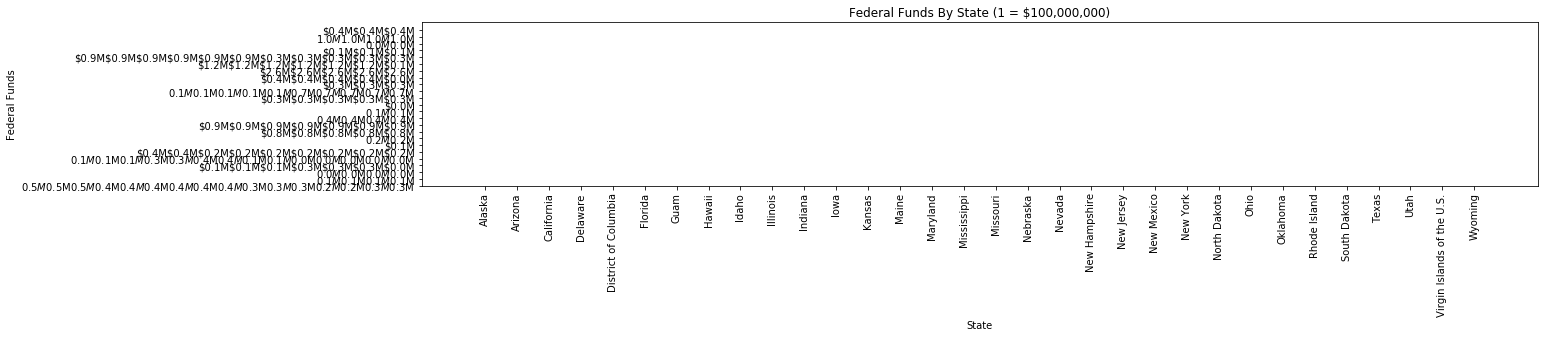

In [79]:
no_il_funds = no_il.groupby("state_x")[["obligatedTotalAmount"]].sum()
no_il_funds = no_il_funds.iloc[:,0]
x_axis = np.arange(len(no_il_funds))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, no_il_funds, color="b", alpha=0.00005, align="edge")
plt.xticks(tick_place, no_il_funds.index, rotation="vertical")
plt.title("Federal Funds By State (1 = $100,000,000)")
plt.xlabel("State")
plt.ylabel("Federal Funds")
plt.show()


In [69]:
alaska = funding_sum[funding_sum["state_x"] == "Alaska"]
alaska["obligatedTotalAmount"].sum()

5950490.0

In [ ]:
location = [["lat", "lng"]].astype(float)

In [ ]:
location = geo_codes_clean[["latitude", "longitude"]].astype(float)

In [ ]:

maps_url = ("https://maps.googleapis.com/maps/api/geocode/json?"
                'address={0}&key={1}').format(target_city, gkey)

fig = gmaps.figure()

heatmap_layer = gmaps.heatmap_layer(location, weights=humidity, 
                                    dissipating=False, max_intensity=100, point_radius = 1)

fig.add_layer(heatmap_layer)
fig